<a href="https://colab.research.google.com/github/Benjamin-Wolff/BasketballPointPrediction/blob/main/DS4400_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h2> Julius Randle NBA Point Prediction</h2> </center>
<center> <h3> DS 4400 </h3> </center>
<center><h4>John Cena, Shaan Hossain, Benjamin Wolff, The Rock, Chef Tony </h4></center>

## Outline
1. [Background](#scrollTo=uUPz-w-58S_T)
2. [Data](#scrollTo=eZUhxf1R8S_T)
3. [Implementation](#scrollTo=pClO5dBE8S_W)
4. [Results](#scrollTo=FJWtTuf68S_X)

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

##1. Background 

### 1.1 Problem Statement
We’re planning on using regression to estimate how many points a specific player (Julius Randle) will score in a given game. The model will be trained on a specific player, but the model could be trained on any player in the NBA given that player has data available for features. We’re planning on using data from the SportsDataIO NBA API described below. There is a plethora of information available regarding each player. The samples we’re using are games and we extra various features from them. We plan on using 10-20 features listed below. For each feature there might be hundreds of data points. Our goal is to use 250 data points for each feature component, meaning that this specific player will have had to play 250 games in the past. Our dataset classes will be natural numbers which represent points scored in a game. We will not restrict this range, so it could be any natural number, but given that players typically don’t score 100 points or negative points, we expect an upper and lower bound from our samples. 

Extracting the features will be calling the API and linking together all the features from a respective game. A majority of these features are already numerical. Some of the data such as home vs. away or if the game is in the playoffs are not numerical but can easily be translated into 0s and 1s. We do not plan on using categorical data more complex than true or false values. There will be minimal preprocessing in this aspect. 


### 1.2 Purpose

Since the beginning of organized sports, sports betting has been an important aspect of the game. Today, with the emergence of sports betting apps and websites that provide a number of different betting options, the task of predicting such sports outcomes has become even more interesting. With our project, we intend to focus on one of the main player-specific bets placed for basketball: points scored. We plan to create a regression model that can predict the number of points a given player will score in a given NBA game.
Sports bettors have long tried to “beat the book” and make predictions with a higher likelihood of success than the odds provided by betting companies. With the insights provided by machine learning algorithms and various optimizations we can make, we hope to be able to create a model that can do so. A model that could reliably “beat the book” could provide important information about the game of basketball and what contributes to the success of a player. Similarly, such a model could be very useful and profitable for a basketball bettor who wishes to succeed in bets about a player’s points in a game. 
Ultimately, our project serves to answer an important question: can we use a regression model to, given data for a basketball player, predict the number of points that player will score for a given game.


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

##2. Data

### 2.1 Data Acquisition

We acquired the data from SportsData.io, which contains a large amount of data 


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/Benjamin-Wolff/BasketballPointPrediction/main/julius_randle_career_stats_by_game.csv"

data = pd.read_csv(url, error_bad_lines=False)

### 2.2 Data Analysis

This dataset contains data regarding each of Julius Randle's games. In addition to data regarding the game itself and its teams, this dataset includes some specific information about Julius Randle's performance that we may be able to use to predict future success. Specifics regarding the data can be seen here, under the PlayerGame section: https://sportsdata.io/developers/data-dictionary/nba.

In [ ]:
data.tail(10)

,StatID,Scope,TeamID,PlayerID,SeasonType,Season,Name,Team,Position,Updated,GameID,OpponentID,Opponent,OpponentStatID,Day,DateTime,HomeOrAway,IsGameOver,Games,Started,LineupConfirmed,LineupStatus,FantasyPoints,FanDuelSalary,DraftKingsSalary,YahooSalary,FantasyDataSalary,Minutes,Seconds,FieldGoalsMade,FieldGoalsAttempted,ThreePointersMade,ThreePointersAttempted,FreeThrowsMade,FreeThrowsAttempted,OffensiveRebounds,DefensiveRebounds,Assists,Steals,BlockedShots,...,PersonalFouls,PlusMinus,BlocksAgainst,DoubleDoubles,TripleDoubles,PlayerEfficiencyRating,OffensiveReboundsPercentage,DefensiveReboundsPercentage,TotalReboundsPercentage,AssistsPercentage,StealsPercentage,BlocksPercentage,TurnOversPercentage,UsageRatePercentage,Possessions,Wins,Losses,InjuryStatus,InjuryBodyPart,InjuryNotes,InjuryStartDate,FantasyPointsFanDuel,FantasyPointsDraftKings,FantasyPointsYahoo,FanDuelPosition,DraftKingsPosition,YahooPosition,DivisionWins,DivisionLosses,ConferenceWins,ConferenceLosses,OpponentRank,OpponentPositionRank,OpponentPosition,FantasyDraftSalary,FantasyDraftPosition,FantasyPointsFantasyDraft,Unnamed: 78,Closed,Unnamed: 80
564,916135,PlayerGame,6,20000710,1,2022,Julius Randle,NY,PF,15:16.1,16858,15,MIL,NaN,11/10/21,30:00.0,HOME,1,1,1,1.0,Starting,23.5,9500.0,10300.0,43.0,10300.0,27,13,6,15,3,7,1,2,0,5,1,0,1,...,0,-26,0,0,0,14.12,0.00,20.04,10.02,6.93,0.00,4.40,11.18,31.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.5,26.25,24.5,PF/C,PF/C,PF,NaN,NaN,NaN,NaN,15.0,13.0,NaN,NaN,NaN,26.25,NaN,1,NaN
565,917149,PlayerGame,6,20000710,1,2022,Julius Randle,NY,PF,15:14.9,16870,2,CHA,NaN,11/12/21,00:00.0,AWAY,1,1,1,1.0,Starting,24.1,9400.0,10200.0,41.0,10200.0,32,52,4,15,1,5,1,4,1,7,5,1,0,...,4,-18,1,0,0,-0.54,2.86,20.86,11.68,24.21,1.45,0.00,22.97,26.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.1,27.50,25.1,PF/C,PF/C,PF,NaN,NaN,NaN,NaN,30.0,28.0,NaN,NaN,NaN,27.50,NaN,1,NaN
566,918831,PlayerGame,6,20000710,1,2022,Julius Randle,NY,PF,15:13.5,16899,13,IND,NaN,11/15/21,30:00.0,HOME,1,1,1,1.0,Starting,28.7,9200.0,9700.0,39.0,9700.0,35,29,5,15,1,6,0,1,1,10,5,0,1,...,1,-2,1,1,0,5.11,3.14,28.78,16.53,22.36,0.00,2.76,24.46,27.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.7,33.75,29.7,PF/C,PF/C,PF,NaN,NaN,NaN,NaN,15.0,11.0,NaN,NaN,NaN,33.75,NaN,1,NaN
567,919839,PlayerGame,6,20000710,1,2022,Julius Randle,NY,PF,15:17.3,16915,5,ORL,NaN,11/17/21,30:00.0,HOME,1,1,1,1.0,Starting,22.5,8600.0,9900.0,37.0,9900.0,32,6,4,11,4,10,1,2,0,5,3,1,0,...,5,-21,0,0,0,8.94,0.00,15.57,7.78,14.46,1.52,0.00,20.16,19.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.5,26.25,23.5,PF/C,PF/C,PF,NaN,NaN,NaN,NaN,27.0,28.0,NaN,NaN,NaN,26.25,NaN,1,NaN
568,921383,PlayerGame,6,20000710,1,2022,Julius Randle,NY,PF,15:15.9,16935,22,HOU,NaN,11/20/21,00:00.0,HOME,1,1,1,1.0,Starting,39.5,8400.0,12600.0,35.0,12600.0,33,23,4,15,2,6,6,8,2,8,9,0,0,...,2,2,2,1,0,18.66,7.37,25.00,16.91,47.49,0.00,0.00,9.74,29.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.5,43.50,39.5,PF/C,PF/C,PF,NaN,NaN,NaN,NaN,30.0,20.0,NaN,NaN,NaN,43.50,NaN,1,NaN
569,922070,PlayerGame,6,20000710,1,2022,Julius Randle,NY,PF,15:16.9,16946,11,CHI,NaN,11/21/21,00:00.0,AWAY,1,1,1,1.0,Starting,45.5,8400.0,9700.0,35.0,9700.0,38,33,13,19,1,2,7,8,3,7,3,0,0,...,4,6,0,1,0,31.84,8.30,20.26,14.14,19.85,0.00,0.00,18.16,30.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.5,50.50,45.5,PF/C,PF/C,PF,NaN,NaN,NaN,NaN,5.0,28.0,NaN,NaN,NaN,50.50,NaN,1,NaN
570,923044,PlayerGame,6,20000710,1,2022,Julius Randle,NY,PF,15:17.2,16960,27,LAL,NaN,11/23/21,30:00.0,HOME,1,1,1,1.0,Starting,44.7,8400.0,10000.0,35.0,10000.0,33,47,7,17,1,5,5,8,1,15,5,1,0,...,5,-2,1,1,0,18.37,3.22,36.74,22.28,26.25,1.43,0.00,16.31,33.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.7,49.50,45.7,PF/C,PF/C,PF,NaN,NaN,NaN,NaN,26.0,9.0,NaN,NaN,NaN,49.50,NaN,1,NaN
571,924364,PlayerGame,6,20000710,1,2022,Julius Randle,NY,PF,15:19.5,16977,29,PHO,NaN,11/26/21,00:00.0,HOME,1,1,1,1.0,Starting,24.2,8700.0,10100.0,36.0,10100.0,31,37,3,8,0,2,3,4,2,4,4,2,1,...,0,-7,0,0,0,12.32,5.95,17.35,10.59,20.62,3.15,2.97,29.06,17.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.2,26.50,27.2,PF/C,PF/C,PF,NaN,NaN,NaN,NaN,5.0

### 2.3 Extracting Relevant Features and the Target (Points)
Next, we had to separate our feature values from our target values. Doing so took some effort, since we had to use past game data as features for each game, but we were able to successfully do so. We also had to remove some unnecessary/irrelevant data columns that would not be useful.

In [ ]:
import datetime

In [ ]:
data_cpy = data.copy()

# creates the points category
data_cpy["Points"] = (data_cpy["ThreePointersMade"] * 3) + ((data_cpy["FieldGoalsMade"] - data_cpy["ThreePointersMade"]) * 2) + data_cpy["FreeThrowsMade"]


In [ ]:
# remove unnecessary columns from the data frame
removal_columns = ['StatID', 'Scope', 'TeamID', 'PlayerID', 'SeasonType', 'Season', 'Name',
       'Team', 'Position', 'Updated', 'GameID', 'OpponentID', 'Games',
       'OpponentStatID', 'DateTime', 'IsGameOver', 'Started', 'LineupStatus', 'LineupConfirmed',
       'Seconds', 'OffensiveRebounds', 'DefensiveRebounds', 'DoubleDoubles', 'TripleDoubles',
       'Assists', 'Steals', 'BlockedShots', 'Turnovers', 'PersonalFouls',
       'PlusMinus', 'BlocksAgainst',	'FantasyDataSalary',
       'PlayerEfficiencyRating', 'OffensiveReboundsPercentage',
       'DefensiveReboundsPercentage', 'TotalReboundsPercentage',
       'AssistsPercentage', 'StealsPercentage', 'BlocksPercentage',
       'TurnOversPercentage', 'Possessions', 'InjuryBodyPart', 'InjuryNotes', 'InjuryStartDate',
       'DivisionWins', 'DivisionLosses', 'ConferenceWins', 
       'ConferenceLosses', 'Wins', 'Losses', 'FanDuelPosition', 'DraftKingsPosition', 'YahooPosition', 'FantasyDraftSalary',
       'FieldGoalsMade', 'FieldGoalsAttempted', 'ThreePointersMade', 'ThreePointersAttempted', 'FreeThrowsMade', 'FreeThrowsAttempted',
       'OpponentPosition', 'FantasyDraftPosition', 'Unnamed: 78', 'Closed', 'Unnamed: 80', 'OpponentPositionRank']
data_good = data_cpy.drop(labels=removal_columns, axis=1)

In [ ]:
data_good['InjuryStatus'].fillna(value="", inplace=True)

data_good2 = data_good.copy()

# change Home or Away to 0s and 1s
data_good2['HomeOrAway'] = data_good['HomeOrAway'].map({'HOME': 1, 'AWAY': 0})

# injury: non-null `InjuryStatus` paired with 0 `Minutes`
injured_count = 0
days_since_injury = [] ## will add as a `DaysSinceInjury` column (data point)
for row in range(len(data_good)):
  if data_good['InjuryStatus'][row] != "" and data_good['Minutes'][row] == 0:
    injured_count = 0
  else:
    if row == 0:
      injured_count = 0
    else:
      injured_count += (datetime.datetime.strptime(data_good['Day'][row],  '%m/%d/%y') - datetime.datetime.strptime(data_good['Day'][row - 1],  '%m/%d/%y')).days
  days_since_injury.append(injured_count)

# add the new column to the dataframe
data_good2["DaysSinceInjury"] = days_since_injury

# some of the data has only been collected after 2016, so remove all entries with null values
data_good2 = data_good2[data_good2['OpponentRank'].notnull()]
data_good2 = data_good2[data_good2['YahooSalary'].notnull()]
data_good2 = data_good2[data_good2["DraftKingsSalary"].notnull()]

# reset index
data_good2.reset_index(inplace=True, drop=True)
data_good2.tail()


,Opponent,Day,HomeOrAway,FantasyPoints,FanDuelSalary,DraftKingsSalary,YahooSalary,Minutes,UsageRatePercentage,InjuryStatus,FantasyPointsFanDuel,FantasyPointsDraftKings,FantasyPointsYahoo,OpponentRank,FantasyPointsFantasyDraft,Points,DaysSinceInjury
441,CHI,11/21/21,0,45.5,8400.0,9700.0,35.0,38,30.97,,45.5,50.50,45.5,5.0,50.50,34,239
442,LAL,11/23/21,1,44.7,8400.0,10000.0,35.0,33,33.10,,45.7,49.50,45.7,26.0,49.50,20,241
443,PHO,11/26/21,1,24.2,8700.0,10100.0,36.0,31,17.90,,27.2,26.50,27.2,5.0,26.50,9,244
444,ATL,11/27/21,0,26.2,8700.0,10200.0,36.0,31,23.63,,26.2,27.25,26.2,21.0,27.25,8,245
445,BKN,11/30/21,0,47.8,8500.0,9400.0,35.0,39,29.31,,49.8,49.75,49.8,14.0,49.75,24,248


In [ ]:
data_final = data_good2.copy()

def average_last_n(df, window_size, reference_column, output_column):
  """
    Finds the average of the previous window_size number of values for a column,
      and creates a new column to represent these values.
  """
  lst = []

  for i in range(len(df)):
      if(i < window_size):
          lst.append(df[reference_column].iloc[0:i].mean())
      else:
          lst.append(df[reference_column].iloc[i-window_size:i].mean())

  lst[0] = 0
  df[output_column] = lst
  return



columns_to_average = ['FantasyPoints', 'FanDuelSalary',
       'DraftKingsSalary', 'YahooSalary', 'Minutes', 'UsageRatePercentage',
       'FantasyPointsFanDuel', 'FantasyPointsDraftKings',
       'FantasyPointsYahoo',
       'FantasyPointsFantasyDraft', 'Points']

# iteratively update all the columns to be average of last 10
for col in columns_to_average:
  new_name = col + "Avg"
  average_last_n(data_final, 10, col, new_name)

  if col != "Points":
    data_final.drop(labels=col, inplace=True, axis=1)

# perform one-hot encoding with the opponents
data_final = pd.concat([data_final, pd.get_dummies(data_final.Opponent, prefix='Opponent')], axis=1)
data_final = data_final.drop(labels=["Day", "Opponent"], axis=1)
data_final.drop(index=data_final.index[0], axis=0, inplace=True)


data_final = data_final[data_final["DaysSinceInjury"] != 0]
data_final.drop(columns="InjuryStatus", inplace=True)

data_final.columns

Index(['HomeOrAway', 'OpponentRank', 'Points', 'DaysSinceInjury',
       'FantasyPointsAvg', 'FanDuelSalaryAvg', 'DraftKingsSalaryAvg',
       'YahooSalaryAvg', 'MinutesAvg', 'UsageRatePercentageAvg',
       'FantasyPointsFanDuelAvg', 'FantasyPointsDraftKingsAvg',
       'FantasyPointsYahooAvg', 'FantasyPointsFantasyDraftAvg', 'PointsAvg',
       'Opponent_ATL', 'Opponent_BKN', 'Opponent_BOS', 'Opponent_CHA',
       'Opponent_CHI', 'Opponent_CLE', 'Opponent_DAL', 'Opponent_DEN',
       'Opponent_DET', 'Opponent_GS', 'Opponent_HOU', 'Opponent_IND',
       'Opponent_LAC', 'Opponent_LAL', 'Opponent_MEM', 'Opponent_MIA',
       'Opponent_MIL', 'Opponent_MIN', 'Opponent_NO', 'Opponent_NY',
       'Opponent_OKC', 'Opponent_ORL', 'Opponent_PHI', 'Opponent_PHO',
       'Opponent_POR', 'Opponent_SA', 'Opponent_SAC', 'Opponent_TOR',
       'Opponent_UTA', 'Opponent_WAS'],
      dtype='object')

### 2.4 Data Visualization

We decided to create some graphs in order to better visualize our data and gain some initial insights on the data.

To do so, we used Matplotlib to make use of its options for plots.

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Points')

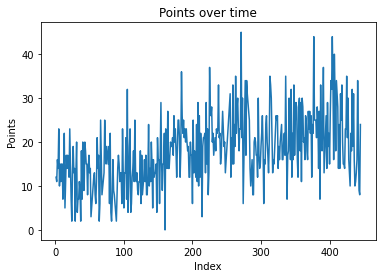

In [ ]:
# rough plot of points scored over time
plt.plot(data_final['Points'])

plt.title("Points over time")
plt.xlabel("Index")
plt.ylabel("Points")

Based on the plot, predicting the number of points scored by Juliuss Randle may be difficult to predict, since the number of points scored seems to be slightly unpredictable

### 2.5 Splitting the Data

The last step working with the data was to split the data into a training and testing set and preparing these sets to use for the algorithms. This step was additionally trivial, as Scikit-learn has the train_test_split method that does this splitting into random subsets (with 75% of the data in the training set and 25% in the testing set).

In [ ]:
from sklearn.model_selection import train_test_split

features = data_final.drop(columns="Points")

target = data_final["Points"]

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1000)

We additionally realized that, since our data has some some features with very diffent ranges of values from others, scaling the data could help the accuracy of the model. As a result, we scaled the training and testing data using the preprocessing.scale method in Scikit-learn.

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

##3. Implementation

### 3.1 Linear Regression

Our first algorithm was the linear regression, which during training fits the features each with coefficients to attempt to represent the data with a plane. We chose this model because it is very simple and provides a good baseline to compare to other models.

To do so, we used Scikit-learn's LinearRegression model.

In [ ]:
from sklearn.linear_model import LinearRegression

We also use some of Scikit-learn's metrics for measuring regression accuracy

In [ ]:
from sklearn.metrics import explained_variance_score

We first applied the model with the unscaled data.

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X=X_train, y= y_train)

lin_train_pred = lin_reg.predict(X_train)
lin_test_pred = lin_reg.predict(X_test)

# compute explained_variance_score
lin_train_variance = explained_variance_score(y_train, lin_train_pred)
lin_test_variance = explained_variance_score(y_test, lin_test_pred)

# compute accuracies
lin_train_accuracy = lin_reg.score(X_train, y_train)
lin_test_accuracy = lin_reg.score(X_test, y_test)

Next we applied it to the scaled data.

In [ ]:
lin_reg_scaled = LinearRegression()
lin_reg_scaled.fit(X=X_train_scaled, y= y_train)

lin_train_pred_scaled = lin_reg_scaled.predict(X_train_scaled)
lin_test_pred_scaled = lin_reg_scaled.predict(X_test_scaled)

# compute explained_variance_score
lin_train_variance_scaled = explained_variance_score(y_train, lin_train_pred_scaled)
lin_test_variance_scaled = explained_variance_score(y_test, lin_test_pred_scaled)

Compute the Train and Test Accuracy

In [ ]:
lin_train_accuracy_scaled = lin_reg_scaled.score(X_train_scaled, y_train)
lin_test_accuracy_scaled = lin_reg_scaled.score(X_test_scaled, y_test)

print("Linear Regression Accuracy:")
print("\t Training set accuracy with scaling: " + format(lin_train_accuracy_scaled*100, '.2f') + '%')
print("\t  set accuracy with scaling: " + format(lin_test_accuracy_scaled*100, '.2f') + '%\n')
print("Linear Regression Variance:")
print("\t Training set variance with scaling: " + format(lin_train_variance_scaled, '.4f'))
print("\t Testing set variance with scaling: " + format(lin_test_variance_scaled, '.4f'))

Linear Regression Accuracy:
	 Training set accuracy with scaling: 26.36%
	  set accuracy with scaling: 20.17%

Linear Regression Variance:
	 Training set variance with scaling: 0.2636
	 Testing set variance with scaling: 0.2279


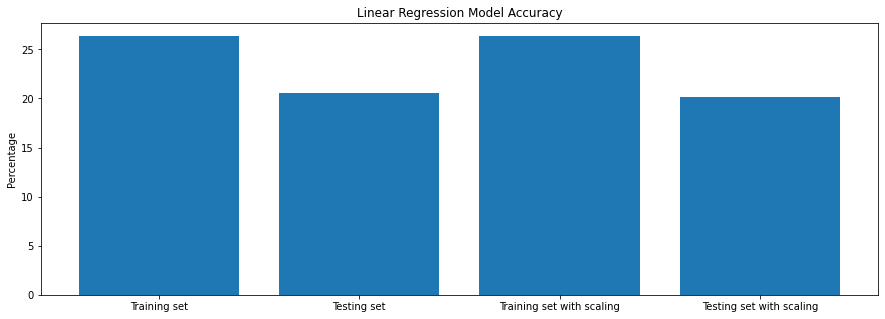

In [ ]:
import matplotlib.pyplot as plt

xAxis = ["Training set", "Testing set", 
         "Training set with scaling", 
         "Testing set with scaling"]
yAxis = [lin_train_accuracy*100, lin_test_accuracy*100, 
         lin_train_accuracy_scaled*100, lin_test_accuracy_scaled*100]

plt.figure(figsize=(15, 5))
plt.bar(xAxis,yAxis)
plt.title('Linear Regression Model Accuracy')
plt.ylabel('Percentage')

plt.show()

###3.2 Ridge Regression

Our next algorithm was the ridge regression, which is similar to linear regression but utilizes an L2 loss regresssion. It tends to do well when the features are highly correlated, which should be the case for our dataset.

In [ ]:
from sklearn.linear_model import Ridge

We first applied the model with the unscaled data.

In [ ]:
# create and fit the Ridge Regression model
ridge_reg = Ridge()
ridge_reg.fit(X=X_train, y= y_train)

ridge_train_pred = ridge_reg.predict(X_train)
ridge_test_pred = ridge_reg.predict(X_test)

# computer explained_variance_score
ridge_train_variance = explained_variance_score(y_train, ridge_train_pred)
ridge_test_variance = explained_variance_score(y_test, ridge_test_pred)

# compute accuracy
ridge_train_accuracy = ridge_reg.score(X_train, y_train)
ridge_test_accuracy = ridge_reg.score(X_test, y_test)

Next we applied it to the scaled data.

In [ ]:
# create and fit the Ridge Regression moodel with scaled data
ridge_reg_scaled = Ridge()
ridge_reg_scaled.fit(X=X_train_scaled, y= y_train)

ridge_train_pred_scaled = ridge_reg_scaled.predict(X_train_scaled)
ridge_test_pred_scaled = ridge_reg_scaled.predict(X_test_scaled)

# computer explained_variance_score
ridge_train_variance_scaled = explained_variance_score(y_train, ridge_train_pred_scaled)
ridge_test_variance_scaled = explained_variance_score(y_test, ridge_test_pred_scaled)

# compute accuracy
ridge_train_accuracy_scaled = ridge_reg_scaled.score(X_train_scaled, y_train)
ridge_test_accuracy_scaled = ridge_reg_scaled.score(X_test_scaled, y_test)


In [ ]:
print("Ridge Regression Accuracy:")
print("\t Training set accuracy with no scaling: " + format(ridge_train_accuracy*100, '.2f') + '%')
print("\t Testing set accuracy with no scaling: " + format(ridge_test_accuracy*100, '.2f') + '%\n')
print("\t Training set accuracy with scaling: " + format(ridge_train_accuracy_scaled*100, '.2f') + '%')
print("\t Testing set accuracy with scaling: " + format(ridge_test_accuracy_scaled*100, '.2f') + '%\n')
print("Ridge Regression Variance:")
print("\t Training set variance with no scaling: " + format(ridge_train_variance, '.4f'))
print("\t Testing set variance with no scaling: " + format(ridge_test_variance, '.4f') + '\n')
print("\t Training set variance with scaling: " + format(ridge_train_variance_scaled, '.4f'))
print("\t Testing set variance with scaling: " + format(ridge_test_variance_scaled, '.4f'))

Ridge Regression Accuracy:
	 Training set accuracy with no scaling: 26.31%
	 Testing set accuracy with no scaling: 22.03%

	 Training set accuracy with scaling: 25.93%
	 Testing set accuracy with scaling: 19.69%

Ridge Regression Variance:
	 Training set variance with no scaling: 0.2631
	 Testing set variance with no scaling: 0.2431

	 Training set variance with scaling: 0.2593
	 Testing set variance with scaling: 0.2258


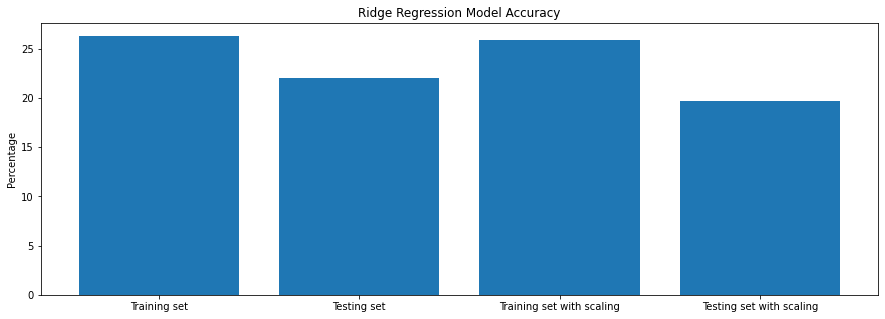

In [ ]:
import matplotlib.pyplot as plt

xAxis = ["Training set", "Testing set", 
         "Training set with scaling", 
         "Testing set with scaling"]
yAxis = [ridge_train_accuracy*100, ridge_test_accuracy*100, 
         ridge_train_accuracy_scaled*100, ridge_test_accuracy_scaled*100]

plt.figure(figsize=(15, 5))
plt.bar(xAxis,yAxis)
plt.title('Ridge Regression Model Accuracy')
plt.ylabel('Percentage')

plt.show()

In order to better optimize the model, we use Scikit-learn's GridSearchCV, which performs cross-validation and tests a number of different hyperparameters to determine the best options.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
r_param_grid = {"alpha":[.001, .01, .1, 1, 10, 100]}

r_grid_search = GridSearchCV(Ridge(max_iter=1000000, random_state=4400), r_param_grid, cv=5)

# fit the grid search object on the training data (CV will be performed on this)
r_grid_search.fit(X=X_train, y=y_train)

print("Unscaled")
# result of grid search
print("Best parameters: ", r_grid_search.best_params_)
print("Best cross-validation score: ", r_grid_search.best_score_)

# the performance of the best found parameters on the test set
ridge_test_gs = r_grid_search.score(X_test, y_test)
print("Test set score: ", format(ridge_test_gs, '.4f'))

print("\nScaled")

r_s_grid_search = GridSearchCV(Ridge(max_iter=1000000, random_state=4400), r_param_grid, cv=5)

# fit the grid search object on the training data (CV will be performed on this)
r_s_grid_search.fit(X=X_train_scaled, y=y_train)

# result of grid search
print("Best parameters: ", r_s_grid_search.best_params_)
print("Best cross-validation score: ", r_s_grid_search.best_score_)

# the performance of the best found parameters on the test set
ridge_test_gs_s = r_s_grid_search.score(X_test_scaled, y_test)
print("Test set score: ", format(ridge_test_gs_s, '.4f'))

Unscaled
Best parameters:  {'alpha': 100}
Best cross-validation score:  0.1413649249138719
Test set score:  0.2822

Scaled
Best parameters:  {'alpha': 100}
Best cross-validation score:  0.12566139621443687
Test set score:  0.1487


### 3.3 Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
# Neural Network Files Included in GitHub Repo

##4. Results

### 4.1 Accuracy Results

Next, we combined the accuracy results to compare.

In [ ]:
print("Linear Regression Accuracy:")
print("\t Training set accuracy with no scaling: " + format(lin_train_accuracy*100, '.2f') + '%')
print("\t Testing set accuracy with no scaling: " + format(lin_test_accuracy*100, '.2f') + '%\n')
print("\t Training set accuracy with scaling: " + format(lin_train_accuracy_scaled*100, '.2f') + '%')
print("\t Testing set accuracy with scaling: " + format(lin_test_accuracy_scaled*100, '.2f') + '%\n')

print("Linear Regression Variance:")
print("\t Training set variance with scaling: " + format(lin_train_variance_scaled, '.4f'))
print("\t Testing set variance with scaling: " + format(lin_test_variance_scaled, '.4f') + '\n')

print("Ridge Regression Accuracy:")
print("\t Training set accuracy with no scaling: " + format(ridge_train_accuracy*100, '.2f') + '%')
print("\t Testing set accuracy with no scaling: " + format(ridge_test_accuracy*100, '.2f') + '%\n')
print("\t Training set accuracy with scaling: " + format(ridge_train_accuracy_scaled*100, '.2f') + '%')
print("\t Testing set accuracy with scaling: " + format(ridge_test_accuracy_scaled*100, '.2f') + '%\n')
print("\t Testing set accuracy after hyperparameter tuning:", format(ridge_test_gs * 100, '.2f') + '%')
print("\t Testing set accuracy after hyperparameter tuning with scaling:", format(ridge_test_gs_s * 100, '.2f') + '%\n')

print("Ridge Regression Variance:")
print("\t Training set variance with no scaling: " + format(ridge_train_variance, '.4f'))
print("\t Testing set variance with no scaling: " + format(ridge_test_variance, '.4f') + '\n')
print("\t Training set variance with scaling: " + format(ridge_train_variance_scaled, '.4f'))
print("\t Testing set variance with scaling: " + format(ridge_test_variance_scaled, '.4f'))

Linear Regression Accuracy:
	 Training set accuracy with no scaling: 26.36%
	 Testing set accuracy with no scaling: 20.53%

	 Training set accuracy with scaling: 26.36%
	 Testing set accuracy with scaling: 20.17%

Linear Regression Variance:
	 Training set variance with scaling: 0.2636
	 Testing set variance with scaling: 0.2279

Ridge Regression Accuracy:
	 Training set accuracy with no scaling: 26.31%
	 Testing set accuracy with no scaling: 22.03%

	 Training set accuracy with scaling: 25.93%
	 Testing set accuracy with scaling: 19.69%

	 Testing set accuracy after hyperparameter tuning: 28.22%
	 Testing set accuracy after hyperparameter tuning with scaling: 14.87%

Ridge Regression Variance:
	 Training set variance with no scaling: 0.2631
	 Testing set variance with no scaling: 0.2431

	 Training set variance with scaling: 0.2593
	 Testing set variance with scaling: 0.2258


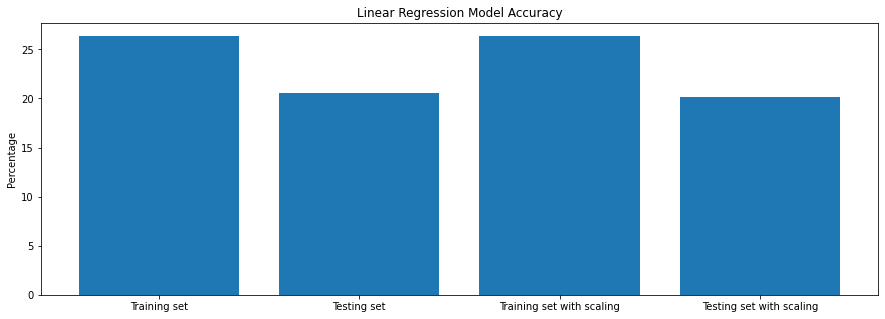

In [ ]:
import matplotlib.pyplot as plt

xAxis = ["Training set", "Testing set", 
         "Training set with scaling", 
         "Testing set with scaling"]
yAxis = [lin_train_accuracy*100, lin_test_accuracy*100, 
         lin_train_accuracy_scaled*100, lin_test_accuracy_scaled*100]

plt.figure(figsize=(15, 5))
plt.bar(xAxis,yAxis)
plt.title('Linear Regression Model Accuracy')
plt.ylabel('Percentage')

plt.show()

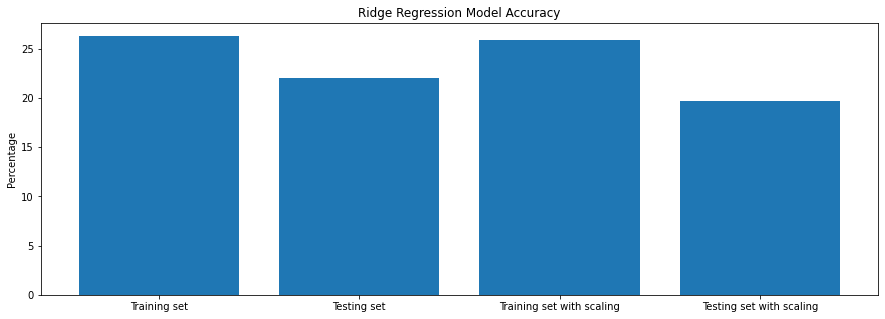

In [ ]:
import matplotlib.pyplot as plt

xAxis = ["Training set", "Testing set", 
         "Training set with scaling", 
         "Testing set with scaling"]
yAxis = [ridge_train_accuracy*100, ridge_test_accuracy*100, 
         ridge_train_accuracy_scaled*100, ridge_test_accuracy_scaled*100]

plt.figure(figsize=(15, 5))
plt.bar(xAxis,yAxis)
plt.title('Ridge Regression Model Accuracy')
plt.ylabel('Percentage')

plt.show()

We additionally created a method to determine the accuracy of this model (with some slack).

In [ ]:
def accuracy_slack(y_train, yhat):
  counter = 0
  for i in range(0, len(y_train)):
    if abs(y_train[i] - yhat[i]) < 1:
      counter+= 1
  return counter/len(y_train)